In [2]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Okt

# 워드클라우드
from wordcloud import WordCloud

# 카운트함수
from collections import Counter

In [4]:
df_1=pd.read_csv('./비짓부산_유튜브.csv',encoding='utf-8')

In [5]:
df_1['title'][0:]

0      [EVENT] 힙한! 파크콘서트를 함께 즐겨보세요~✨ 부산 최대의 콘서트 #원아시아...
1      [EVENT] 별들의 만남 k-pop 콘서트를 즐겨보세요~🎇부산 최대의 콘서트 #원...
2      [EVENT] 동남권 대표 관광지 온라인 공모 이벤트에 도전?!! WOW~ 나만의 ...
3      부산에서 커피 한잔 할래요옹~ ☕ 카페 사장 최준의 이색 카페 여행(ENG SUB)...
4      [Play.Work.Live] 부산의 다채로운 반전 매력에 Love Dive~ Th...
                             ...                        
537              2022년 부산바다수영클럽 상반기 이기대~해운대 횡단수영 드론촬영 영상
538    শেখ মুজিবের পাগলা ফ্যান | নেতা নেত্রির ফানি ভি...
539                                  부산 여행 숨은 명소_동백섬 둘레길
540    ഒരുമിച്ച് മരിക്കാനെത്തിയ  കാമുകൻ , കാമുകി ട്രെ...
541                                             윤정이의 킁킁킁
Name: title, Length: 542, dtype: object

In [6]:
df_1['title']= df_1['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df_1['title']=df_1["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [7]:
df_1

,title
0,EVENT 힙한 파크콘서트를 함께 즐겨보세요 부산 최대의 콘서트 원아시아페스티벌
1,EVENT 별들의 만남 k pop 콘서트를 즐겨보세요 부산 최대의 콘서트 원아시아...
2,EVENT 동남권 대표 관광지 온라인 공모 이벤트에 도전 WOW 나만의 핫플이 여...
3,부산에서 커피 한잔 할래요옹 카페 사장 최준의 이색 카페 여행 ENG SUB Uni...
4,Play Work Live 부산의 다채로운 반전 매력에 Love Dive The ...
...,...
537,2022년 부산바다수영클럽 상반기 이기대 해운대 횡단수영 드론촬영 영상
538,শ খ ম জ ব র প গল ফ য ন ন ত ন ত র র ফ ন ভ ড ও P...
539,부산 여행 숨은 명소_동백섬 둘레길
540,ഒര മ ച ച മര ക ക ന ത ത യ ക മ കൻ ക മ ക ട ര യ ന ന...


In [8]:
df_1['title'].to_csv('./비짓부산_split.csv',encoding='utf-8',index=False)

In [9]:
df_1['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,,EVENT,힙한,파크콘서트를,함께,즐겨보세요,부산,최대의,콘서트,원아시아페스티벌,...,None,None,None,None,None,None,None,None,None,None
1,,EVENT,별들의,만남,k,pop,콘서트를,즐겨보세요,부산,최대의,...,None,None,None,None,None,None,None,None,None,None
2,,EVENT,동남권,대표,관광지,온라인,공모,이벤트에,도전,WOW,...,None,None,None,None,None,None,None,None,None,None
3,부산에서,커피,한잔,할래요옹,카페,사장,최준의,이색,카페,여행,...,None,None,None,None,None,None,None,None,None,None
4,,Play,Work,Live,부산의,다채로운,반전,매력에,Love,Dive,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2022년,부산바다수영클럽,상반기,이기대,해운대,횡단수영,드론촬영,영상,None,None,...,None,None,None,None,None,None,None,None,None,None
538,শ,খ,ম,জ,ব,র,প,গল,ফ,য,...,Pagla,Producer,None,None,None,None,None,None,None,None
539,부산,여행,숨은,명소_동백섬,둘레길,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
540,ഒര,മ,ച,ച,മര,ക,ക,ന,ത,ത,...,മ,ന,ന,ൽ,തള,ള,വ,ട,ട,


In [10]:
# 파일로드
data_1 = pd.read_csv('./비짓부산_split.csv',encoding='utf-8')
data_1 = data_1['title']

In [11]:
data_1

0           EVENT 힙한 파크콘서트를 함께 즐겨보세요 부산 최대의 콘서트 원아시아페스티벌
1       EVENT 별들의 만남 k pop 콘서트를 즐겨보세요 부산 최대의 콘서트 원아시아...
2       EVENT 동남권 대표 관광지 온라인 공모 이벤트에 도전 WOW 나만의 핫플이 여...
3      부산에서 커피 한잔 할래요옹 카페 사장 최준의 이색 카페 여행 ENG SUB Uni...
4       Play Work Live 부산의 다채로운 반전 매력에 Love Dive The ...
                             ...                        
537              2022년 부산바다수영클럽 상반기 이기대 해운대 횡단수영 드론촬영 영상
538    শ খ ম জ ব র প গল ফ য ন ন ত ন ত র র ফ ন ভ ড ও P...
539                                  부산 여행 숨은 명소_동백섬 둘레길
540    ഒര മ ച ച മര ക ക ന ത ത യ ക മ കൻ ക മ ക ട ര യ ന ന...
541                                             윤정이의 킁킁킁
Name: title, Length: 542, dtype: object

In [12]:
# 데이터가져오기
f = open("./비짓부산_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [13]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [14]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [15]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산     225
여행      87
영상      73
국제      66
영화제     60
      ... 
아파트      5
클린       5
뚜벅       5
우수상      5
랜선       5
Length: 100, dtype: int64


In [16]:
count_data = korean.to_dict()

In [17]:
count = Counter(count_data)
count

Counter({'부산': 225,
         '여행': 87,
         '영상': 73,
         '국제': 66,
         '영화제': 60,
         '관광': 51,
         '제주': 38,
         '로그': 37,
         '서울': 35,
         '브이': 34,
         '강원도': 31,
         '남구': 31,
         '공모전': 30,
         '코스': 28,
         '추천': 21,
         '강원': 21,
         '홍보': 20,
         '부산여행': 19,
         '여행지': 18,
         '디스커버': 17,
         '자원봉사': 16,
         '카페': 15,
         '투어': 14,
         '강릉': 14,
         '비짓': 12,
         '마을': 12,
         '해운대': 12,
         '야구장': 12,
         '콘텐츠': 11,
         '이벤트': 11,
         '바다': 10,
         '부산관광공사': 10,
         '가을': 10,
         '문화': 10,
         '장려': 10,
         '하루': 10,
         '수상작': 10,
         '맛집': 10,
         '커플': 9,
         '한국': 9,
         '시장': 9,
         '영화': 9,
         '먹방': 8,
         '일리': 8,
         '활동': 8,
         '세계': 8,
         '일상': 8,
         '감독': 8,
         '제주도': 8,
         '버전': 8,
         '채용': 8,
         '여름': 8,
     

In [18]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

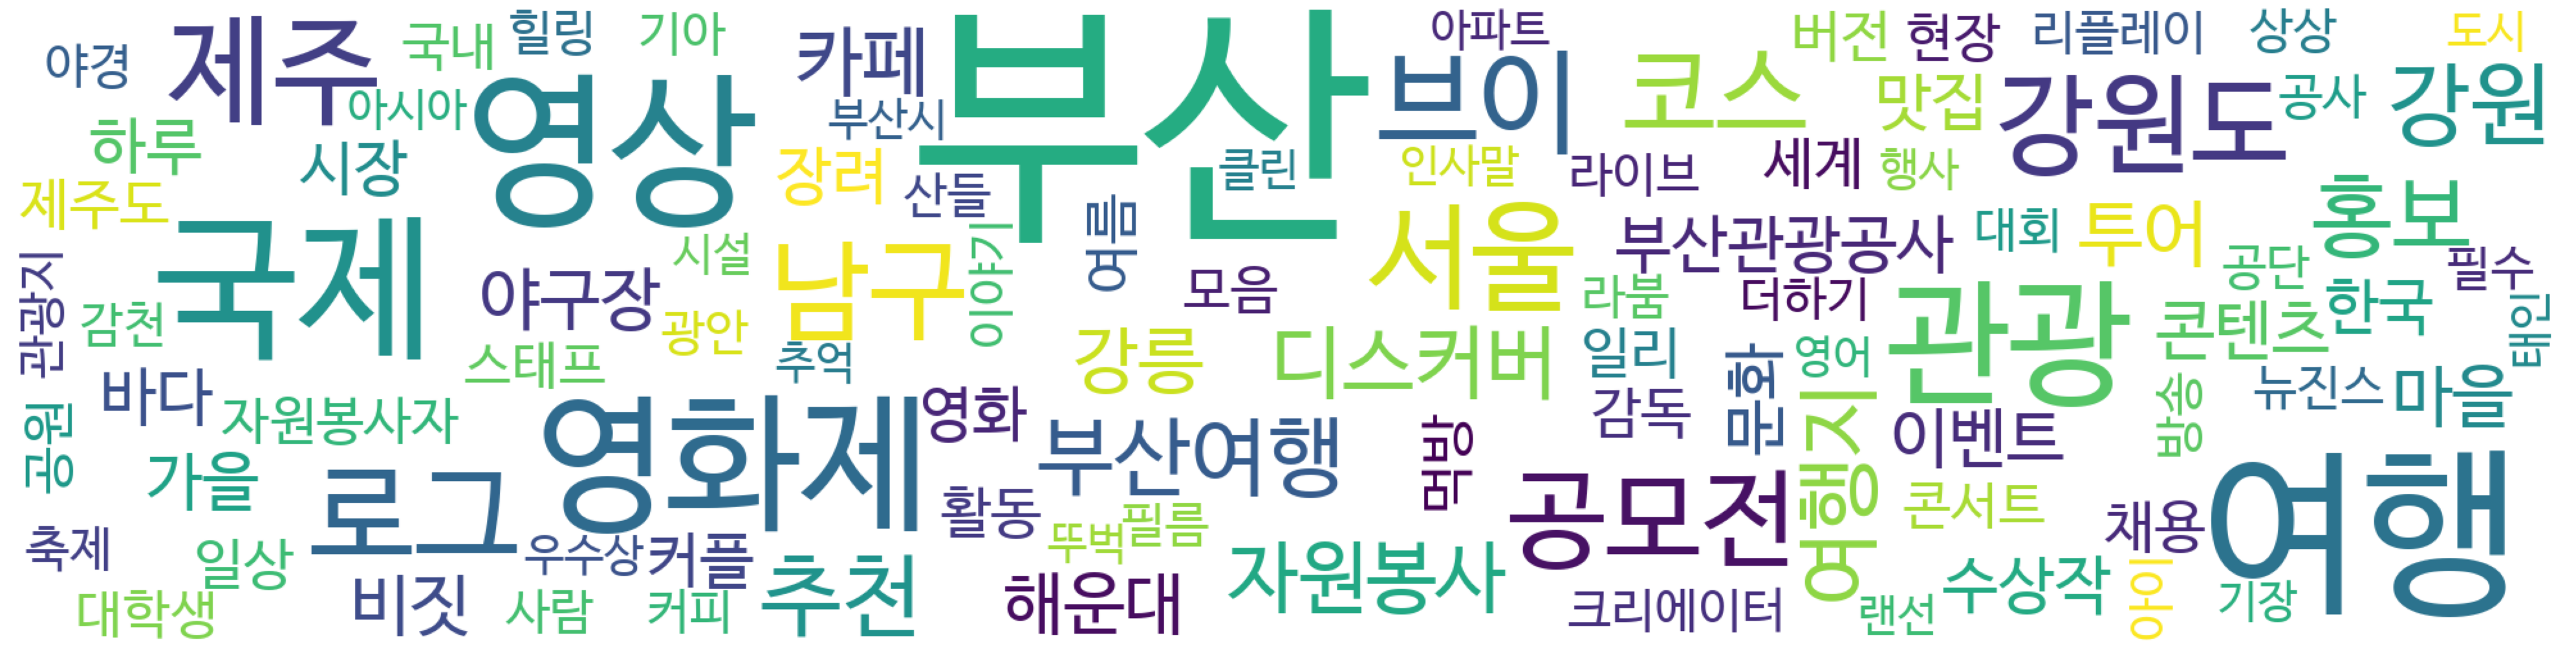

In [19]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()